In [54]:
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt
import rosbag
import pandas as pd
from scipy import integrate
from scipy.interpolate import interp1d
from IPython.display import display
from mpldatacursor import datacursor
import time
import math

In [55]:
#LOAD DATA

filename='2018-11-09-Alumnai'

encoder_df=pd.read_csv('./csv_data/' + filename + '-encoder.csv',converters={'encoder_time': Decimal})
imu_df=pd.read_csv('./csv_data/' + filename + '-imu.csv',converters={'imureal_time': Decimal})
#wifi_df=pd.read_csv('./csv_data/'+filename + '-wifi.csv',converters={'wifi_time': Decimal})


In [56]:
#BRING DATA TO ENCODER TIME

imu_df['imureal_time']=imu_df['imureal_time']-encoder_df['encoder_time'][0]


encoder_df['encoder_time']=encoder_df['encoder_time']-encoder_df['encoder_time'][0]

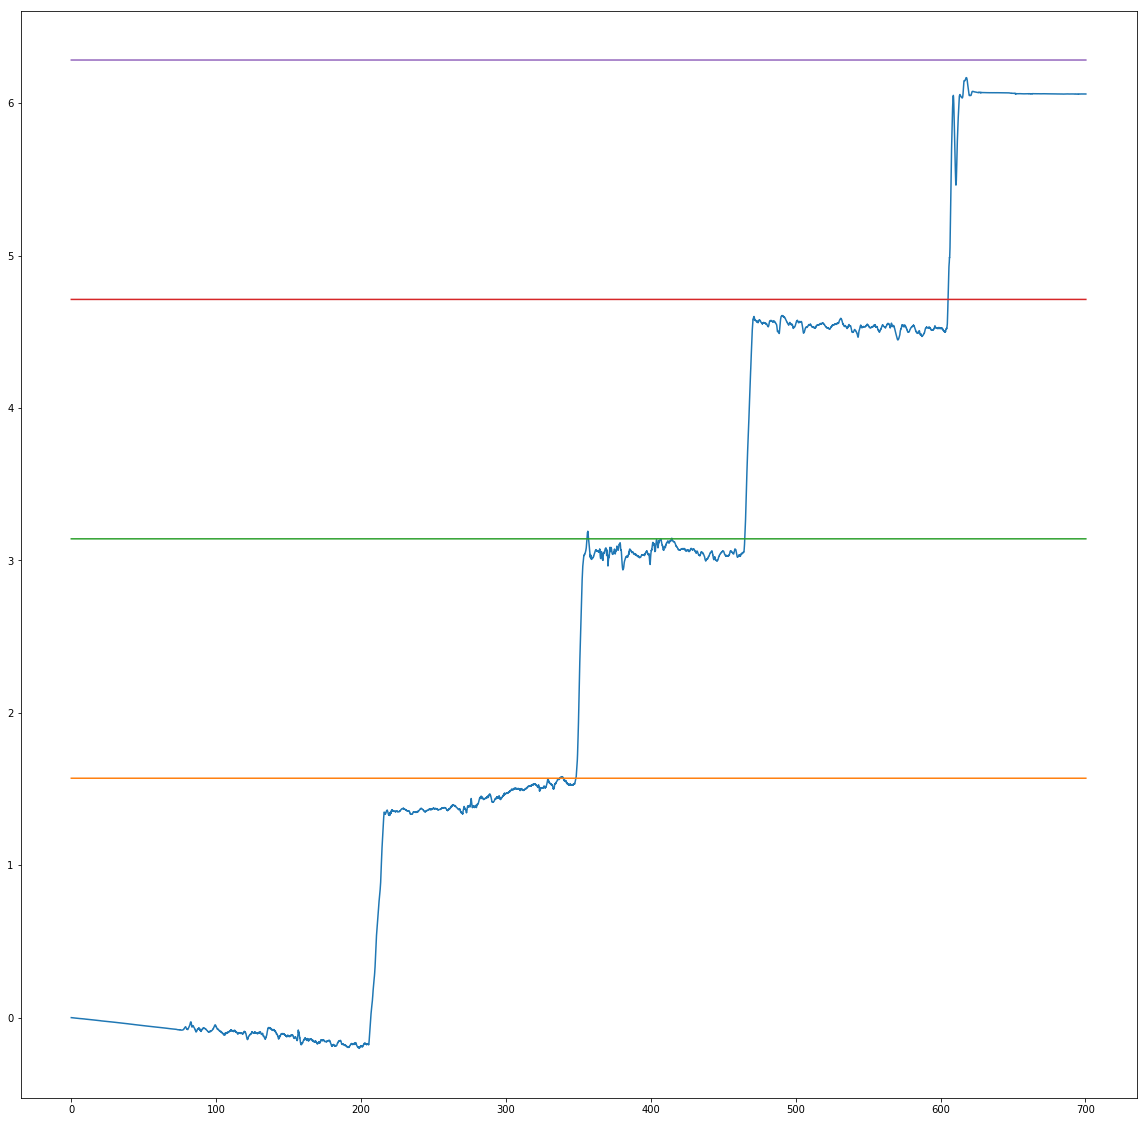

In [57]:
#INTEGRATE IMU DATA

imu_df['imureal_angvZ']=imu_df['imureal_angvZ']-imu_df['imureal_angvZ'][0]

#plt.figure(1)
#plt.plot(imu_df['imureal_time'],imu_df['imureal_angvZ'])

angvZ=np.array(imu_df['imureal_angvZ'])
imu_time_float=np.array(np.float64(imu_df['imureal_time']))

theta_cum=integrate.cumtrapz(angvZ,imu_time_float,initial=0)
imu_df['theta']=theta_cum  

plt.figure(1)
plt.plot(imu_df['imureal_time'],theta_cum)
plt.plot(imu_df['imureal_time'],np.ones([imu_time_float.shape[0]])*1*(np.pi)/2)
plt.plot(imu_df['imureal_time'],np.ones([imu_time_float.shape[0]])*2*(np.pi)/2)
plt.plot(imu_df['imureal_time'],np.ones([imu_time_float.shape[0]])*3*(np.pi)/2)
plt.plot(imu_df['imureal_time'],np.ones([imu_time_float.shape[0]])*4*(np.pi)/2)
i=0
fact=1

angv=np.array([])
theta=np.array([])

for anglevals in theta_cum:
    
    if anglevals <= (fact*(np.pi)/2):
        
        angv=np.append(angv,angvZ[i])
        
    else:
        angle_cum=integrate.cumtrapz(angv,imu_time_float[(i-angv.shape[0]):i],initial=0)
        theta=np.append(theta,angle_cum)
        angv=np.array([])
        fact=fact+1


    i=i+1
    

In [58]:
#LOAD TO ARRAYS

mean_enc=np.array(encoder_df['encoder_mean'])
enc_time=np.array(encoder_df['encoder_time'])
imu_time=np.array(imu_df['imureal_time'])
fin_theta=np.array(imu_df['theta'])



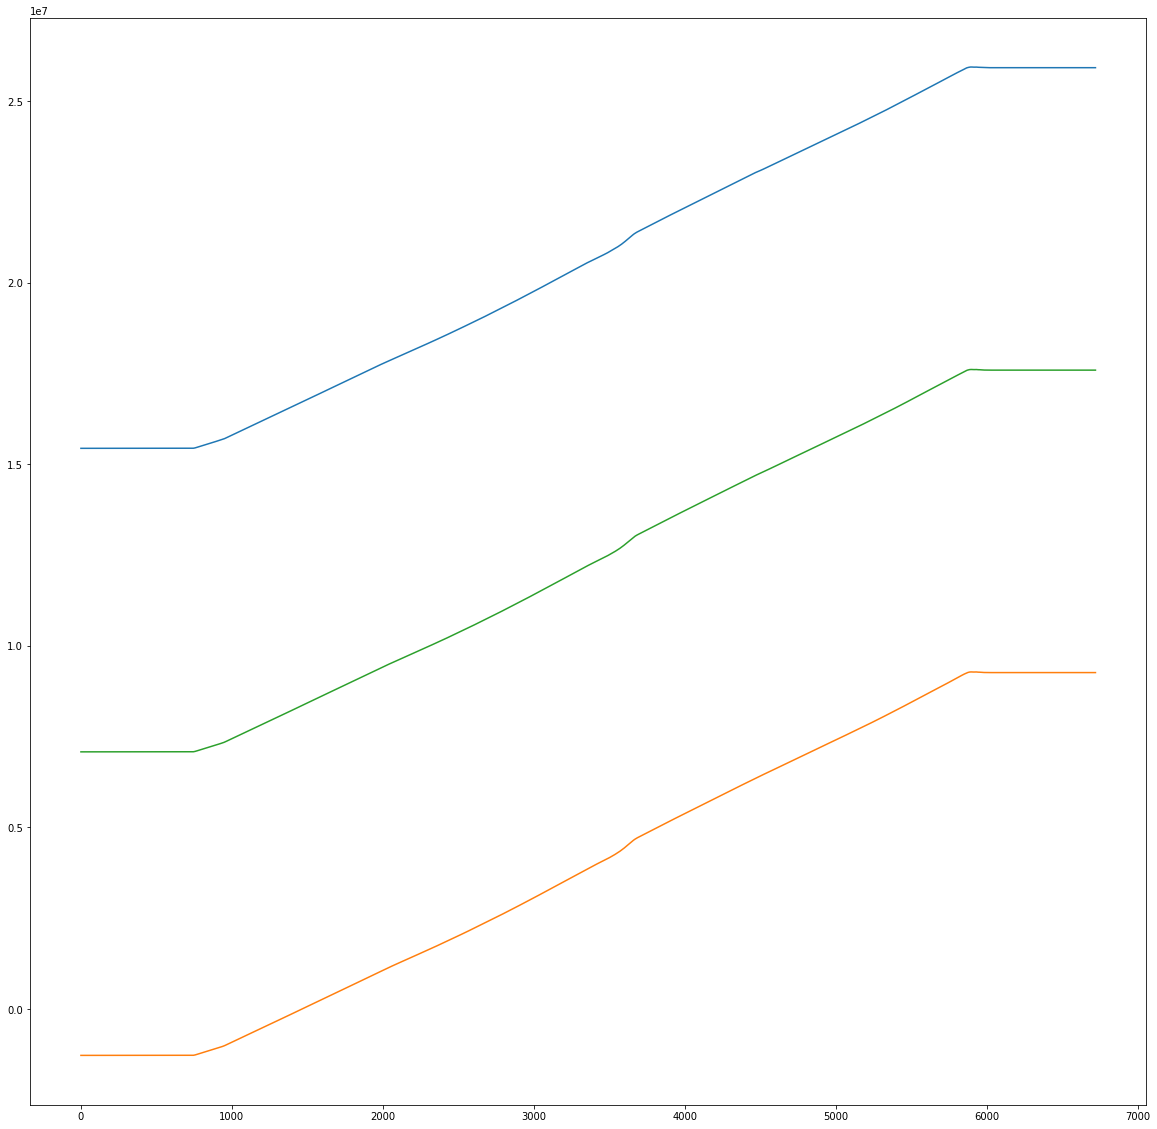

In [59]:
plt.plot(encoder_df.loc[:,'encoder_x'])
plt.plot(encoder_df.loc[:,'encoder_y'])
plt.plot(encoder_df.loc[:,'encoder_mean'])


In [60]:
start = time.time()

dist=0
i=0

encXcalib=6.608284615932709e-05;
encYcalib=6.603486193757895e-05;
mean_calib=np.mean([encXcalib,encYcalib])

enc_dist=np.array([])
angles=np.array([])
mean_theta=np.array([])
mean_enctime=np.array([])
end_enctime=np.array([])

encsize=mean_enc.size

search_start=0
enciter=1

for timevals in imu_time:
        
    if enciter < encsize:
    
        if timevals <= enc_time[enciter]:

            angles=np.append(angles,fin_theta[i])

        else:

            dist=(mean_enc[enciter]-mean_enc[(enciter-1)])*mean_calib
            
            enc_dist=np.append(enc_dist,dist)
            
            mean_enctime=np.append(mean_enctime,((enc_time[enciter]+enc_time[enciter-1])/2))
            
            end_enctime=np.append(end_enctime,enc_time[enciter])

            mean_angle=angles.mean()
    

            if math.isnan(mean_angle):
                mean_theta=np.append(mean_theta,mean_theta[enciter-2])
            else:       
                mean_theta=np.append(mean_theta,mean_angle)

            enciter=enciter+1
            angles=np.array([])
    
    i=i+1    

mean_theta=-mean_theta
end = time.time()
print 'Completed in: ',end-start   

Completed in:  0.680412054062


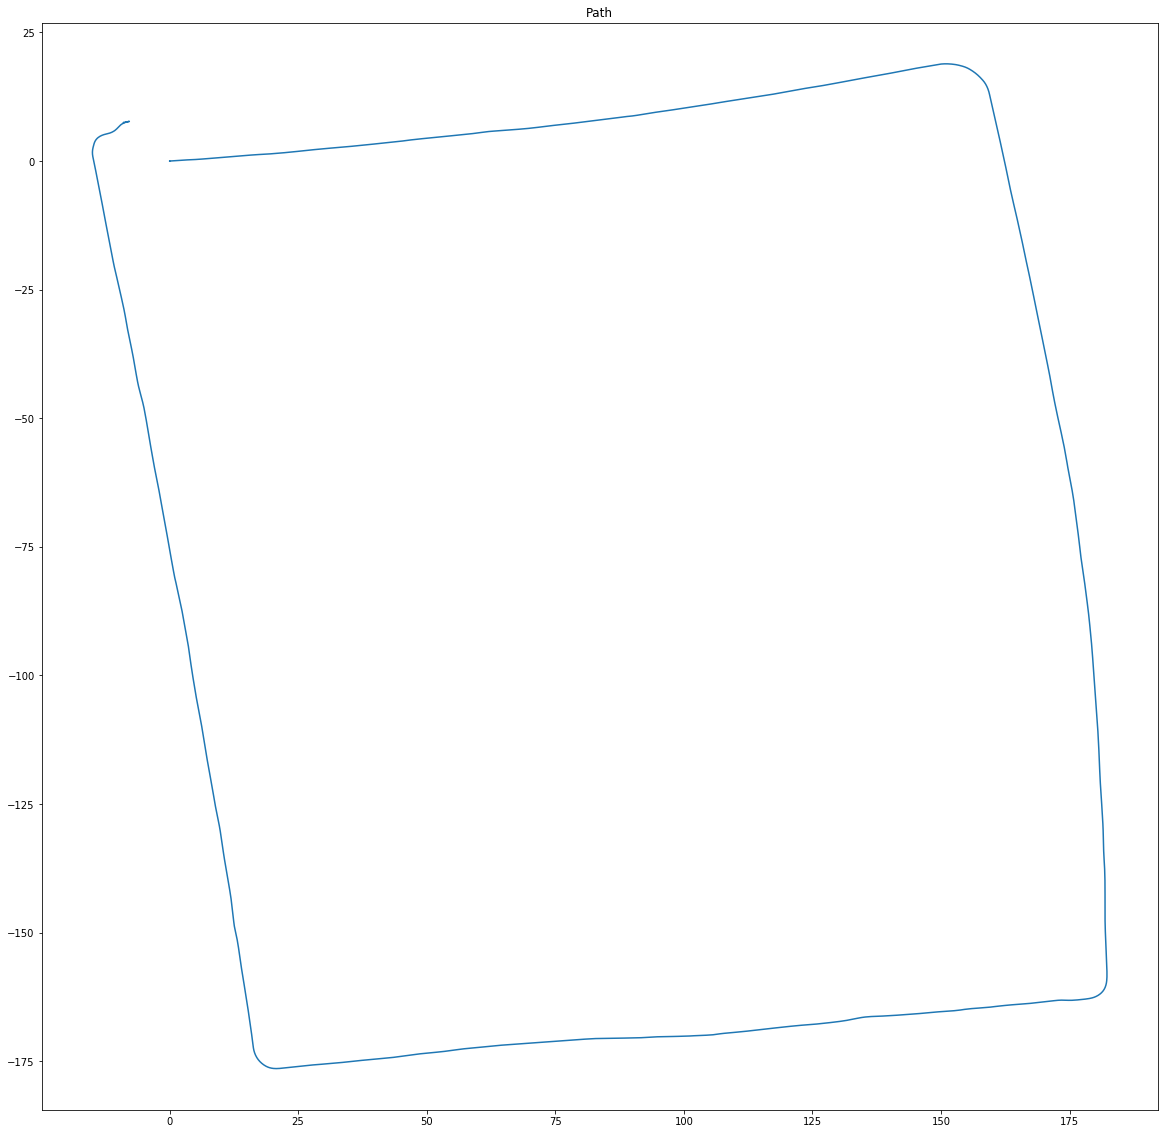

11.6867677243


In [51]:
#mean_theta=mean_theta-mean_theta[0]
plt.rcParams['figure.figsize'] = [20,20]

dx=np.multiply(enc_dist,np.cos(mean_theta))
dy=np.multiply(enc_dist,np.sin(mean_theta))
Xd=0
Yd=0

X_pos=np.array([])
Y_pos=np.array([])


for num in range(0,encsize-1):
    
    Xd=Xd+dx[num]
    Yd=Yd+dy[num]
    
    X_pos=np.append(X_pos,Xd)
    Y_pos=np.append(Y_pos,Yd)

    

plt.plot(X_pos,Y_pos)
plt.axis('equal')
plt.title('Path')
datacursor()
plt.show()

error=np.sqrt((X_pos[-1] -X_pos[0])**2 + (Y_pos[-1] -Y_pos[0])**2)
print error

In [61]:
imureal_angvZ

NameError: name 'imureal_angvZ' is not defined

In [62]:
angvZ

array([ 0.        , -0.00121414,  0.        , ..., -0.00242828,
        0.00121414,  0.00121414])